In [2]:
from google.colab import drive

In [3]:
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

In [5]:
import warnings
warnings.filterwarnings('ignore')

In [6]:
df = pd.read_csv('/content/drive/MyDrive/pls_isl_conflict_comments.csv')

In [7]:
df.head()

,comment_id,score,self_text,subreddit,created_time
0,k5480sx,1,Exactly! I can remember the humanitarian aid s...,worldnews,16-10-2023 19:39
1,k547q14,1,*We are the only part of the World that has Fr...,Palestine,16-10-2023 19:36
2,k547elf,1,"I don’t make Israeli strategy, nor am I Israel...",worldnews,16-10-2023 19:34
3,k54742r,1,These people didn't vote Hamas in or something...,worldnews,16-10-2023 19:32
4,k5473zi,1,We don't care what you do. We just want to liv...,worldnews,16-10-2023 19:32


In [8]:
df.tail()

,comment_id,score,self_text,subreddit,created_time
189626,k3sdwfc,42,US. This is bullshit,Palestine,07-10-2023 05:20
189627,k3sdixt,1,I am in the United States and it has the dotte...,Palestine,07-10-2023 05:17
189628,k3sccp2,54,In which country are you?\nSometimes maps adap...,Palestine,07-10-2023 05:08
189629,k3ritvj,116,You can't give up on something you only preten...,worldnews,07-10-2023 01:46
189630,k3riboh,30,&gt; The head of Islamic Jihad denounced Arab ...,worldnews,07-10-2023 01:42


In [9]:
df.shape

(189631, 5)

In [10]:
df.columns

Index(['comment_id', 'score', 'self_text', 'subreddit', 'created_time'], dtype='object')

In [11]:
df.duplicated().sum()

0

In [12]:
df.isnull().sum()

comment_id      0
score           0
self_text       0
subreddit       0
created_time    0
dtype: int64

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 189631 entries, 0 to 189630
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   comment_id    189631 non-null  object
 1   score         189631 non-null  int64 
 2   self_text     189631 non-null  object
 3   subreddit     189631 non-null  object
 4   created_time  189631 non-null  object
dtypes: int64(1), object(4)
memory usage: 7.2+ MB


In [14]:
df.describe()

,score
count,189631.000000
mean,28.583607
std,179.946085
min,-934.000000
25%,1.000000
50%,2.000000
75%,10.000000
max,16463.000000


In [15]:
df.nunique()

comment_id      189631
score             1761
self_text       186338
subreddit           14
created_time     13562
dtype: int64

In [16]:
object_columns = df.select_dtypes(include=['object']).columns
print("Object type columns:")
print(object_columns)

numerical_columns = df.select_dtypes(include=['int', 'float']).columns
print("\nNumerical type columns:")
print(numerical_columns)

Object type columns:
Index(['comment_id', 'self_text', 'subreddit', 'created_time'], dtype='object')

Numerical type columns:
Index(['score'], dtype='object')


In [17]:
df['subreddit'].unique()

array(['worldnews', 'Palestine', 'IsraelPalestine', 'TerrifyingAsFuck',
       'worldnewsvideo', 'AskMiddleEast', 'CombatFootage',
       'PublicFreakout', 'NonCredibleDefense', 'IsrealPalestineWar_23',
       'CrazyFuckingVideos', 'AbruptChaos', 'NoahGetTheBoat',
       'ActualPublicFreakouts'], dtype=object)

In [18]:
df['subreddit'].value_counts()

IsraelPalestine          52622
worldnews                36204
AskMiddleEast            28107
CombatFootage            27901
PublicFreakout           14255
NonCredibleDefense       13865
Palestine                 6968
worldnewsvideo            5598
IsrealPalestineWar_23     2537
TerrifyingAsFuck           546
NoahGetTheBoat             498
AbruptChaos                200
CrazyFuckingVideos         197
ActualPublicFreakouts      133
Name: subreddit, dtype: int64

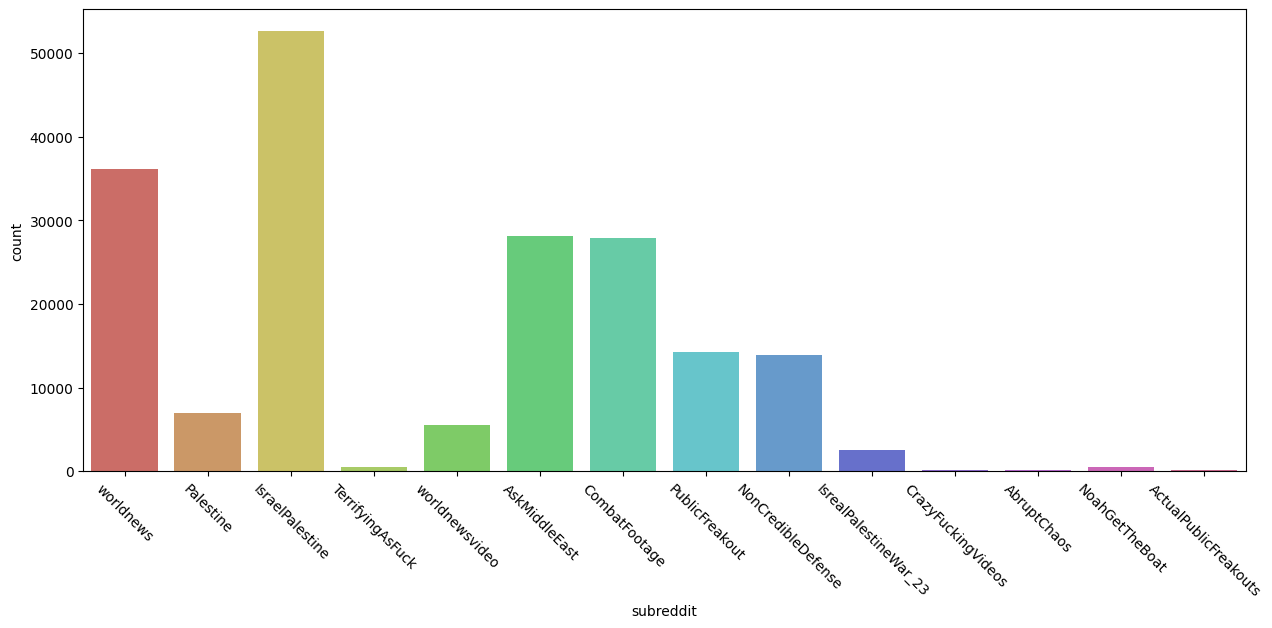

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 6))
sns.countplot(data=df, x='subreddit', palette='hls')
plt.xticks(rotation=-45)
plt.show()


In [20]:
# Count the occurrences of each subreddit in the DataFrame
subreddit_counts = df['subreddit'].value_counts()

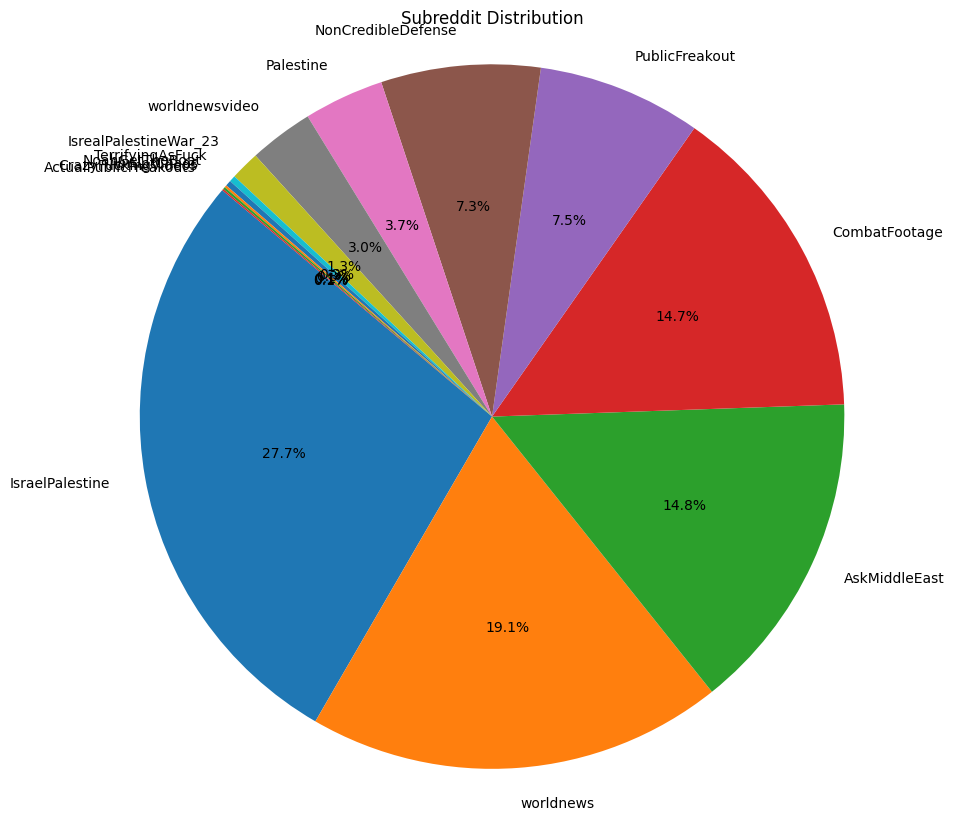

In [21]:
#create a pie chart

plt.figure(figsize = (10,10))
plt.pie(subreddit_counts, labels = subreddit_counts.index, autopct = '%1.1f%%', startangle=140)
plt.title('Subreddit Distribution')
plt.axis('equal')
plt.show()

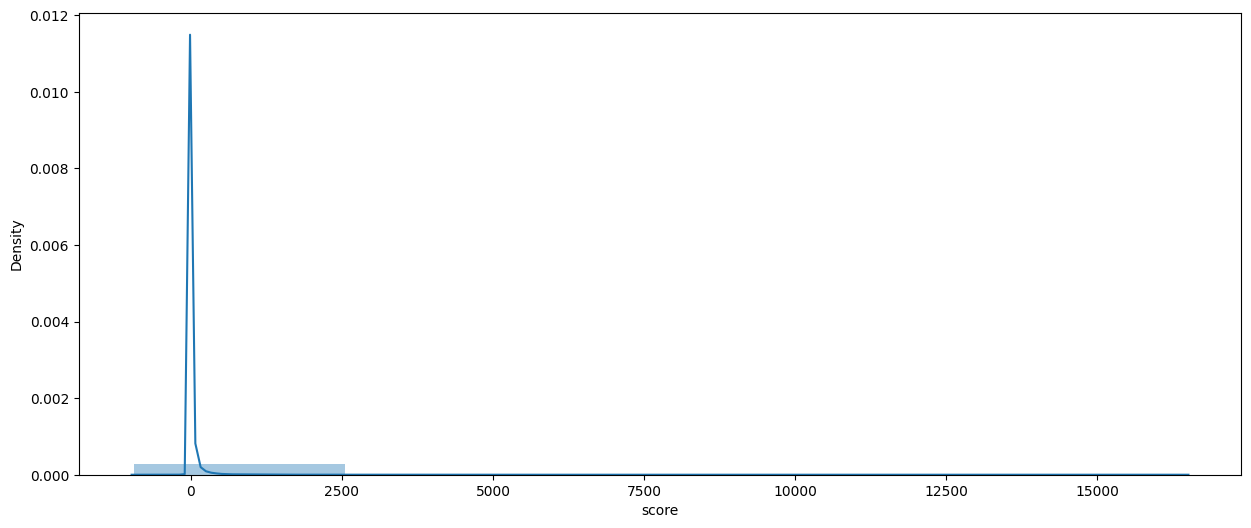

In [22]:
plt.figure(figsize=(15,6))
sns.distplot(df['score'], kde = True, bins = 5)
plt.show()

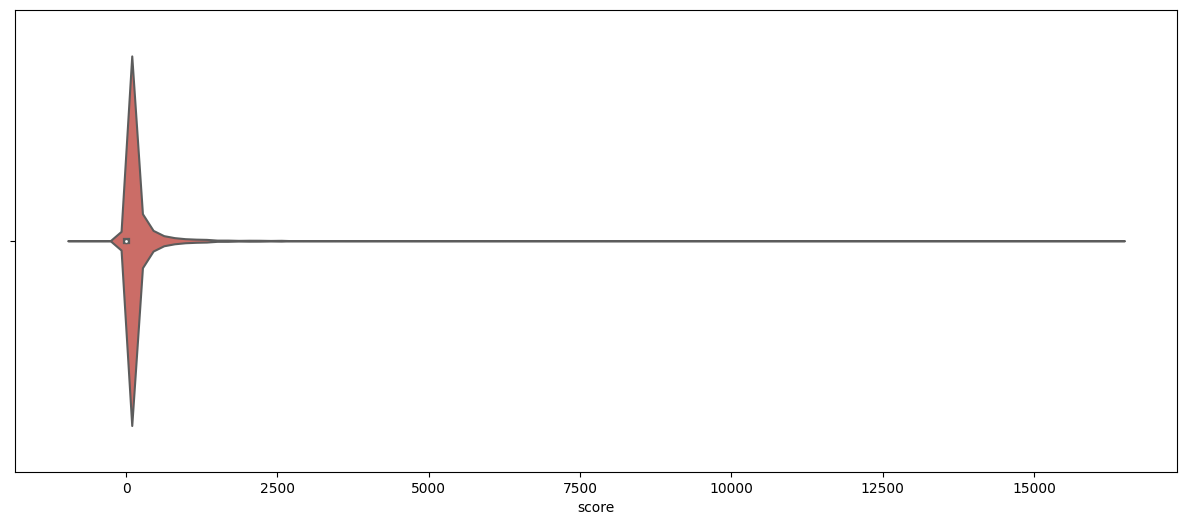

In [23]:
plt.figure(figsize=(15,6))
sns.violinplot(data = df, x='score', palette = 'hls')
plt.show()

In [24]:
df_new = df.copy()

In [25]:
df_new.head()

,comment_id,score,self_text,subreddit,created_time
0,k5480sx,1,Exactly! I can remember the humanitarian aid s...,worldnews,16-10-2023 19:39
1,k547q14,1,*We are the only part of the World that has Fr...,Palestine,16-10-2023 19:36
2,k547elf,1,"I don’t make Israeli strategy, nor am I Israel...",worldnews,16-10-2023 19:34
3,k54742r,1,These people didn't vote Hamas in or something...,worldnews,16-10-2023 19:32
4,k5473zi,1,We don't care what you do. We just want to liv...,worldnews,16-10-2023 19:32


In [26]:
# convert the text to lowercase and remove leading and trailing whitespace, and it will return the cleaned text.
def clean_text(text):
    text = text.lower()
    return text.strip()

In [27]:
df_new['self_text'] = df_new['self_text'].apply(lambda x: clean_text(x))

In [28]:
df_new.head()

,comment_id,score,self_text,subreddit,created_time
0,k5480sx,1,exactly! i can remember the humanitarian aid s...,worldnews,16-10-2023 19:39
1,k547q14,1,*we are the only part of the world that has fr...,Palestine,16-10-2023 19:36
2,k547elf,1,"i don’t make israeli strategy, nor am i israel...",worldnews,16-10-2023 19:34
3,k54742r,1,these people didn't vote hamas in or something...,worldnews,16-10-2023 19:32
4,k5473zi,1,we don't care what you do. we just want to liv...,worldnews,16-10-2023 19:32


In [29]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [30]:
def remove_punctuation(text):
  punctuationfree = "".join([i for i in text if i not in string.punctuation])
  return punctuationfree


In [31]:
df_new['self_text']= df_new['self_text'].apply(lambda x:remove_punctuation(x))

In [32]:
df_new.head()

,comment_id,score,self_text,subreddit,created_time
0,k5480sx,1,exactly i can remember the humanitarian aid st...,worldnews,16-10-2023 19:39
1,k547q14,1,we are the only part of the world that has fre...,Palestine,16-10-2023 19:36
2,k547elf,1,i don’t make israeli strategy nor am i israeli...,worldnews,16-10-2023 19:34
3,k54742r,1,these people didnt vote hamas in or something ...,worldnews,16-10-2023 19:32
4,k5473zi,1,we dont care what you do we just want to live ...,worldnews,16-10-2023 19:32


In [33]:
import re

In [34]:
def tokenization(text):
  tokens = re.split(r'\W+', text)
  return tokens

In [35]:
df_new['self_text']= df_new['self_text'].apply(lambda x: tokenization(x))


In [36]:
df_new.head()

,comment_id,score,self_text,subreddit,created_time
0,k5480sx,1,"[exactly, i, can, remember, the, humanitarian,...",worldnews,16-10-2023 19:39
1,k547q14,1,"[we, are, the, only, part, of, the, world, tha...",Palestine,16-10-2023 19:36
2,k547elf,1,"[i, don, t, make, israeli, strategy, nor, am, ...",worldnews,16-10-2023 19:34
3,k54742r,1,"[these, people, didnt, vote, hamas, in, or, so...",worldnews,16-10-2023 19:32
4,k5473zi,1,"[we, dont, care, what, you, do, we, just, want...",worldnews,16-10-2023 19:32


In [37]:
import nltk

In [38]:
nltk.download('vader_lexicon')
nltk.download('stopwords')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [39]:
stopwords = nltk.corpus.stopwords.words('english')

In [40]:
def remove_stopwords(text):
  output = " ".join(i for i in text if i not in stopwords)
  return output

In [41]:
df_new['self_text'] = df_new['self_text'].apply(lambda x: remove_stopwords(x))

In [43]:
from nltk.stem import WordNetLemmatizer

In [44]:
wordnet_lemmatizer = WordNetLemmatizer()

In [45]:
def lemmatizer(text):
    lemm_text = "".join([wordnet_lemmatizer.lemmatize(word) for word in text])
    return lemm_text



In [46]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [47]:
df_new['self_text']=df_new['self_text'].apply(lambda x:lemmatizer(x))

In [48]:
def remove_emojis(data):
    emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"  # emoticons
                               u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                               u"\U0001F680-\U0001F6FF"  # transport & map symbols
                               u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                               "]+", flags=re.UNICODE)
    return re.sub(emoji_pattern, '', data)

In [49]:
df_new['self_text'] = df_new['self_text'].apply(lambda x: remove_emojis(x))

In [50]:
df_new['self_text'] = df_new['self_text'].apply(lambda x:re.sub(r'\s+[a-zA-Z]\s+', '', x))

In [51]:
df_new['self_text'] = df_new['self_text'].apply(lambda x:re.sub(r'\s+', ' ', x, flags=re.I))

In [52]:
df_new.head()

,comment_id,score,self_text,subreddit,created_time
0,k5480sx,1,exactly remember humanitarian aid streaming st...,worldnews,16-10-2023 19:39
1,k547q14,1,part world freedom speech person exercises fre...,Palestine,16-10-2023 19:36
2,k547elf,1,make israeli strategy israeli jewish support t...,worldnews,16-10-2023 19:34
3,k54742r,1,people didnt vote hamas something cant exactly...,worldnews,16-10-2023 19:32
4,k5473zi,1,dont care want live world literally impossible...,worldnews,16-10-2023 19:32


In [53]:
from textblob import TextBlob

In [54]:
df_new['sentiment'] = df_new['self_text'].apply(lambda x: TextBlob(str(x)).sentiment.polarity)

In [55]:
df_new.head()

,comment_id,score,self_text,subreddit,created_time,sentiment
0,k5480sx,1,exactly remember humanitarian aid streaming st...,worldnews,16-10-2023 19:39,0.083333
1,k547q14,1,part world freedom speech person exercises fre...,Palestine,16-10-2023 19:36,0.000000
2,k547elf,1,make israeli strategy israeli jewish support t...,worldnews,16-10-2023 19:34,0.305159
3,k54742r,1,people didnt vote hamas something cant exactly...,worldnews,16-10-2023 19:32,0.078788
4,k5473zi,1,dont care want live world literally impossible...,worldnews,16-10-2023 19:32,-0.386061


In [56]:
sentiment_correlation = df_new[['score', 'sentiment']].corr()
print('Correlation between "score" and "sentiment":')
print(sentiment_correlation)

Correlation between "score" and "sentiment":
              score  sentiment
score      1.000000  -0.010522
sentiment -0.010522   1.000000


In [59]:
average_score_per_subreddit = df_new.groupby('subreddit')['score'].mean()
print('Average score per subreddit:')
print(average_score_per_subreddit)

Average score per subreddit:
subreddit
AbruptChaos               8.715000
ActualPublicFreakouts    60.563910
AskMiddleEast             4.736400
CombatFootage            40.808430
CrazyFuckingVideos       11.223350
IsraelPalestine           1.436205
IsrealPalestineWar_23     1.746945
NoahGetTheBoat           12.160643
NonCredibleDefense       33.659719
Palestine                11.412600
PublicFreakout           47.413750
TerrifyingAsFuck         36.661172
worldnews                76.210336
worldnewsvideo            8.808324
Name: score, dtype: float64


In [60]:
df_new['created_time'] = pd.to_datetime(df_new['created_time'])

In [61]:
df_new.head()

,comment_id,score,self_text,subreddit,created_time,sentiment
0,k5480sx,1,exactly remember humanitarian aid streaming st...,worldnews,2023-10-16 19:39:00,0.083333
1,k547q14,1,part world freedom speech person exercises fre...,Palestine,2023-10-16 19:36:00,0.000000
2,k547elf,1,make israeli strategy israeli jewish support t...,worldnews,2023-10-16 19:34:00,0.305159
3,k54742r,1,people didnt vote hamas something cant exactly...,worldnews,2023-10-16 19:32:00,0.078788
4,k5473zi,1,dont care want live world literally impossible...,worldnews,2023-10-16 19:32:00,-0.386061


In [62]:
df_new['text_length'] = df_new['self_text'].apply(len)

In [63]:
df_new.head(2)

,comment_id,score,self_text,subreddit,created_time,sentiment,text_length
0,k5480sx,1,exactly remember humanitarian aid streaming st...,worldnews,2023-10-16 19:39:00,0.083333,207
1,k547q14,1,part world freedom speech person exercises fre...,Palestine,2023-10-16 19:36:00,0.000000,78


In [64]:
length_correlation = df_new[['score', 'text_length']].corr()
print('Correlation between "score" and text "length":')
print(length_correlation)

Correlation between "score" and text "length":
                score  text_length
score        1.000000    -0.009741
text_length -0.009741     1.000000


In [ ]:
from collections import Counter

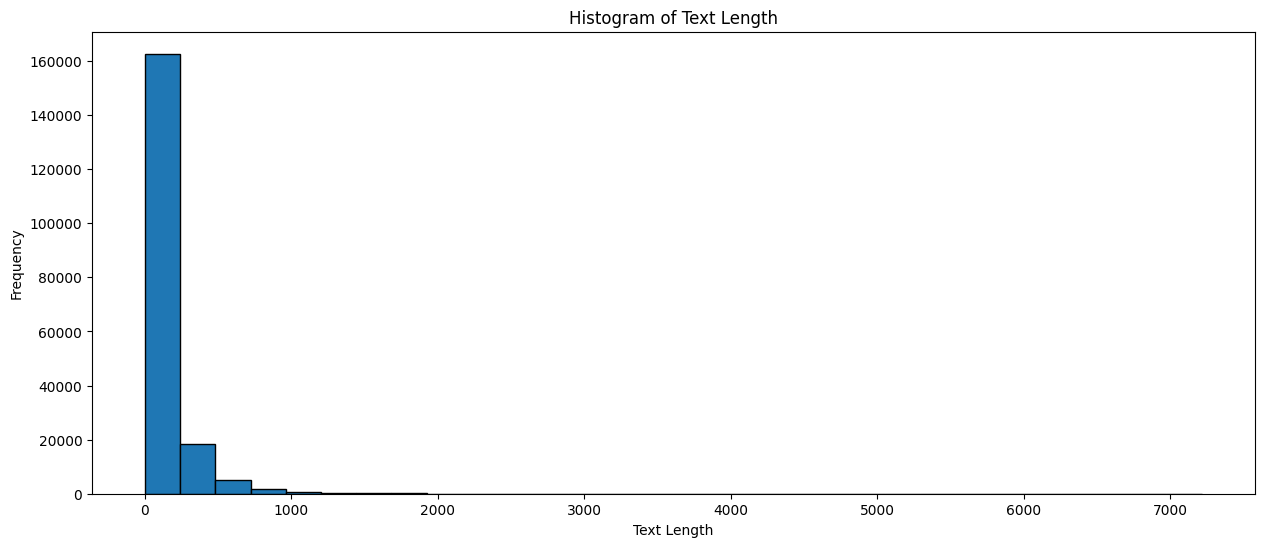

In [65]:
plt.figure(figsize=(15,6))
plt.hist(df_new['text_length'], bins=30, edgecolor='black')
plt.xlabel('Text Length')
plt.ylabel('Frequency')
plt.title('Histogram of Text Length')
plt.show()

In [66]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation as LDA

In [67]:
text_data = df_new['self_text'].astype(str)

In [68]:
text_data

0         exactly remember humanitarian aid streaming st...
1         part world freedom speech person exercises fre...
2         make israeli strategy israeli jewish support t...
3         people didnt vote hamas something cant exactly...
4         dont care want live world literally impossible...
                                ...                        
189626                                          us bullshit
189627    united states dotted west bank gaza strip alth...
189628    country sometimes maps adapt countries view ma...
189629    cant give something pretended support cynical ...
189630    gt head islamic jihad denounced arab attempts ...
Name: self_text, Length: 189631, dtype: object

In [69]:
vectorizer = CountVectorizer(max_df=0.85, stop_words='english')
text_vectorized = vectorizer.fit_transform(text_data)

In [70]:
num_topics = 5
lda = LDA(n_components=num_topics, random_state=42)
lda.fit(text_vectorized)

LatentDirichletAllocation(n_components=5, random_state=42)

In [72]:
def categorize_sentiment(polarity):
    if polarity > 0.05:
        return 'Positive'
    elif polarity < -0.05:
        return 'Negative'
    else:
        return 'Neutral'

In [73]:
df_new['sentiment_category'] = df_new['sentiment'].apply(categorize_sentiment)

In [74]:
df_new.head()

,comment_id,score,self_text,subreddit,created_time,sentiment,text_length,sentiment_category
0,k5480sx,1,exactly remember humanitarian aid streaming st...,worldnews,2023-10-16 19:39:00,0.083333,207,Positive
1,k547q14,1,part world freedom speech person exercises fre...,Palestine,2023-10-16 19:36:00,0.000000,78,Neutral
2,k547elf,1,make israeli strategy israeli jewish support t...,worldnews,2023-10-16 19:34:00,0.305159,180,Positive
3,k54742r,1,people didnt vote hamas something cant exactly...,worldnews,2023-10-16 19:32:00,0.078788,449,Positive
4,k5473zi,1,dont care want live world literally impossible...,worldnews,2023-10-16 19:32:00,-0.386061,175,Negative


In [75]:
df_new['sentiment_category'].unique()

array(['Positive', 'Neutral', 'Negative'], dtype=object)

In [76]:
df_new['sentiment_category'].value_counts()

Neutral     80533
Positive    64950
Negative    44148
Name: sentiment_category, dtype: int64

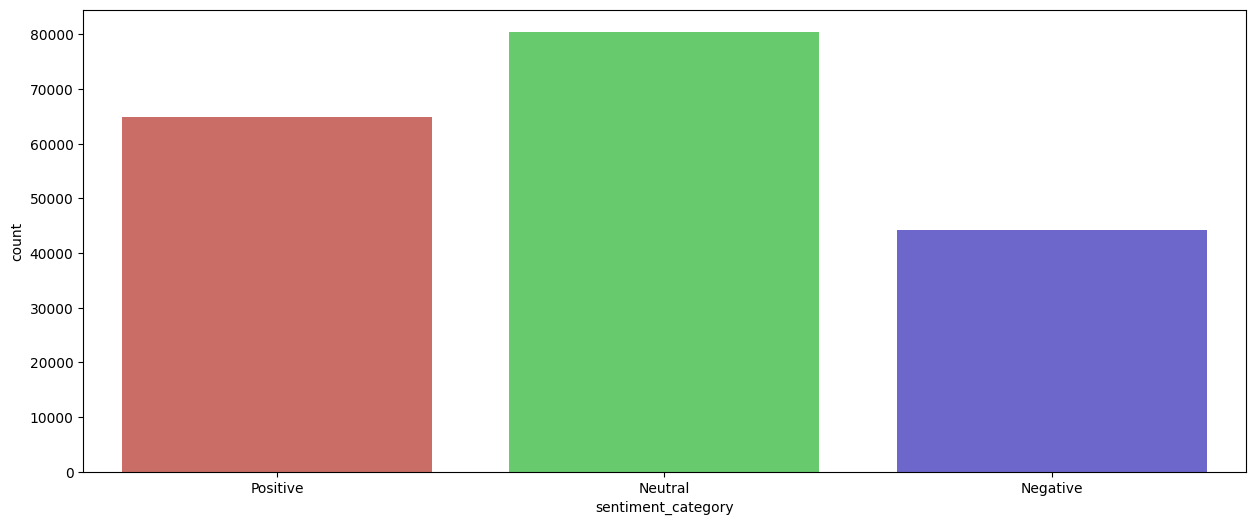

In [78]:
plt.figure(figsize=(15,6))
sns.countplot(data = df_new, x='sentiment_category', palette = 'hls')
plt.show()

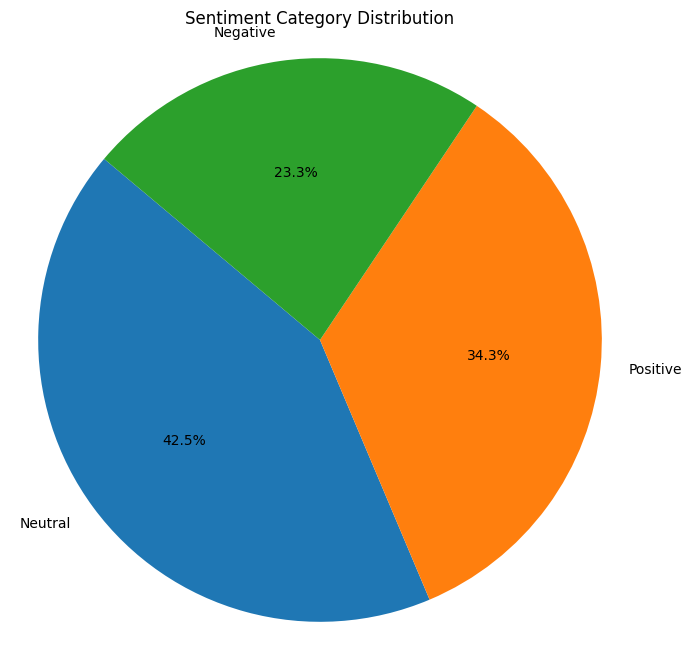

In [79]:
# Group the data by sentiment category and count the number of occurrences
sentiment_counts = df_new['sentiment_category'].value_counts()

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Sentiment Category Distribution')
plt.axis('equal')  # Equal aspect ratio ensures that the pie chart is circular.

plt.show()

In [80]:
def map_sentiment_to_numeric(sentiment_category):
    if sentiment_category == 'Positive':
        return 1
    elif sentiment_category == 'Negative':
        return -1
    else:
        return 0

In [81]:
df_new['sentiment_numeric'] = df_new['sentiment_category'].apply(map_sentiment_to_numeric)

In [83]:
df3 = df_new[['self_text', 'sentiment_numeric']]

In [84]:
df3.head()

,self_text,sentiment_numeric
0,exactly remember humanitarian aid streaming st...,1
1,part world freedom speech person exercises fre...,0
2,make israeli strategy israeli jewish support t...,1
3,people didnt vote hamas something cant exactly...,1
4,dont care want live world literally impossible...,-1


In [85]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import precision_recall_fscore_support
from sklearn.feature_extraction.text import TfidfVectorizer

In [86]:
X = df_new['self_text']
y = df_new['sentiment_numeric']

In [87]:
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X_tfidf = tfidf_vectorizer.fit_transform(X)

In [88]:
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)

In [89]:
from sklearn.linear_model import LogisticRegression

In [90]:
lr_classifier = LogisticRegression()
lr_classifier.fit(X_train, y_train)

LogisticRegression()

In [91]:
y_pred = lr_classifier.predict(X_test)
lr_accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", lr_accuracy)

Accuracy: 0.8466527803411817


In [92]:
precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_pred, average='weighted')
print('Precision:', precision)
print('Recall:', recall)
print('F1 Score:', f1)

Precision: 0.8489424433054571
Recall: 0.8466527803411817
F1 Score: 0.846699868369603
